# Importing Libraries

In [33]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


# Performing SQL operations

In [7]:
conn = sqlite3.connect('sales_database.db')

cur = conn.cursor()

In [8]:
cur.execute(
    '''
    CREATE TABLE sales_table(
    order_id INT,
    dates DATE,
    product_category TEXT,
    product_name TEXT,
    sales FLOAT,
    region TEXT,
    payment_method TEXT
    );

    '''
)

OperationalError: table sales_table already exists

In [ ]:

cur.execute(
    '''
    INSERT INTO sales_table
    VALUES (10001,'01-01-2024','Electronics',	'iPhone 14 Pro',1999.98,'North America','Credit Card'),
    (10002,'02-01-2024','Home Appliances','Dyson V11 Vacuum',499.99,'Europe','PayPal'),
    (10003,'03-01-2024','Clothing','Levi 501 Jeans',209.97,'Asia','Debit Card'),
    (10004,'04-01-2024','Books','The Da Vinci Code',63.96,'North America','Credit Card'),
    (10005,'05-01-2024','Beauty Products','Neutrogena Skincare Set',89.99,'Europe','PayPal'),
    (10006,'06-01-2024','Sports','Wilson Evolution Basketball',149.95,'Asia','Credit Card'),
    (10007,'07-01-2024','Electronics','MacBook Pro 16-inch',2499.99,'North America','Credit Card'),
    (10008,'08-01-2024','Home Appliances','Blueair Classic 480i',1199.98,'Europe','PayPal'),
    (10009,'09-01-2024','Clothing','Nike Air Force',539.94,'Asia','Debit Card'),
    (10010,'10-01-2024','Books','Dune by Frank Herbert',51.98,'North America','Credit Card');

    '''
)


In [ ]:
conn.commit()
conn.close()

# Dataframe

In [11]:
import pandas as pd

In [12]:
query = '''SELECT * FROM sales_table;'''

In [13]:
conn = sqlite3.connect('sales_database.db')
df = pd.read_sql_query(query, conn)
df

,order_id,dates,product_categories,product_names,sales,region,payment_method
0,10001,01-01-2024,Electronics,iPhone 14 Pro,1999.98,North America,Credit Card
1,10002,02-01-2024,Home Appliances,Dyson V11 Vacuum,499.99,Europe,PayPal
2,10003,03-01-2024,Clothing,Levi 501 Jeans,209.97,Asia,Debit Card
3,10004,04-01-2024,Books,The Da Vinci Code,63.96,North America,Credit Card
4,10005,05-01-2024,Beauty Products,Neutrogena Skincare Set,89.99,Europe,PayPal
5,10006,06-01-2024,Sports,Wilson Evolution Basketball,149.95,Asia,Credit Card
6,10007,07-01-2024,Electronics,MacBook Pro 16-inch,2499.99,North America,Credit Card
7,10008,08-01-2024,Home Appliances,Blueair Classic 480i,1199.98,Europe,PayPal
8,10009,09-01-2024,Clothing,Nike Air Force,539.94,Asia,Debit Card
9,10010,10-01-2024,Books,Dune by Frank Herbert,51.98,North America,Credit Card


# Sales Data Analysis Using SQL & Python

# Top 3 ASIA Region Wise product Types total Sales 

In [16]:
query1 = '''SELECT region, product_categories, SUM(sales) AS Total_Sales
FROM sales_table
WHERE region = 'Asia'
GROUP BY region, product_categories
ORDER BY Total_Sales DESC

LIMIT 3;
'''

In [17]:
pd.read_sql_query(query1,conn)

,region,product_categories,Total_Sales
0,Asia,Clothing,749.91
1,Asia,Sports,149.95


# Top 3 Regional Sales

In [18]:
query2 = '''
SELECT region, SUM(sales) AS Total_Sales
FROM sales_table
GROUP BY region
ORDER BY Total_Sales DESC

LIMIT 3;

'''

In [19]:
pd.read_sql_query(query2,conn)

,region,Total_Sales
0,North America,4615.91
1,Europe,1789.96
2,Asia,899.86


# Top 5 Product Types Sales

In [20]:
query3 = '''
SELECT product_categories, SUM(sales) AS Total_Sales
FROM sales_table
GROUP BY  product_categories
ORDER BY Total_Sales DESC

LIMIT 5;
'''
pd.read_sql_query(query3,conn)

,product_categories,Total_Sales
0,Electronics,4499.97
1,Home Appliances,1699.97
2,Clothing,749.91
3,Sports,149.95
4,Books,115.94


# Top 2 Payment Types Sales

In [21]:
query4 = '''
SELECT payment_method, SUM(sales) AS Total_Sales
FROM sales_table
GROUP BY  payment_method
ORDER BY Total_Sales DESC

LIMIT 2;
'''
pd.read_sql_query(query4,conn)

,payment_method,Total_Sales
0,Credit Card,4765.86
1,PayPal,1789.96


# Region wise product types Total Sales

In [29]:
query5 = '''
SELECT region, product_categories, SUM(sales) AS Total_Sales
FROM sales_table
GROUP BY  region, product_categories
ORDER BY Total_Sales DESC;
'''
pd.read_sql_query(query5,conn)

,region,product_categories,Total_Sales
0,North America,Electronics,4499.97
1,Europe,Home Appliances,1699.97
2,Asia,Clothing,749.91
3,Asia,Sports,149.95
4,North America,Books,115.94
5,Europe,Beauty Products,89.99


# visualization Analysis

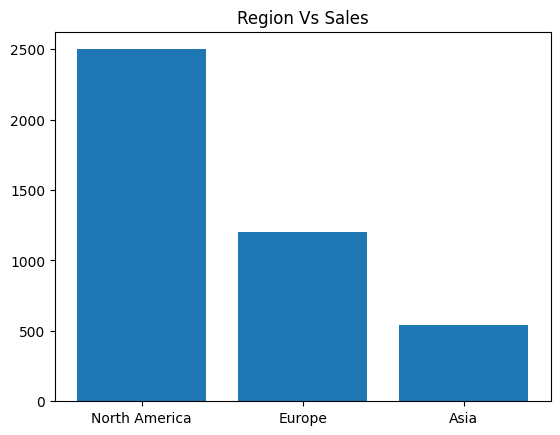

In [35]:
plt.title('Region Vs Sales')

plt.bar(df['region'],df['sales'])

plt.show()

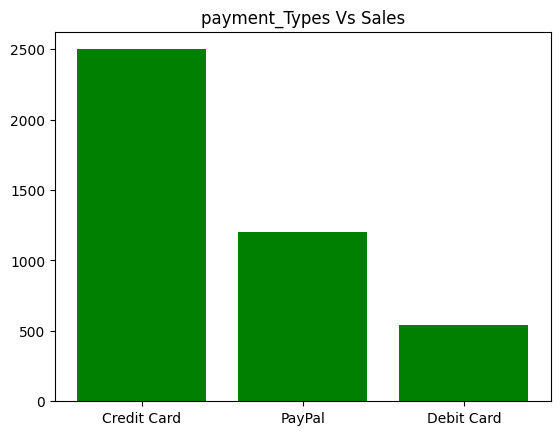

In [41]:
plt.title('payment_Types Vs Sales')

plt.bar(df['payment_method'],df['sales'],color='green')

plt.show()

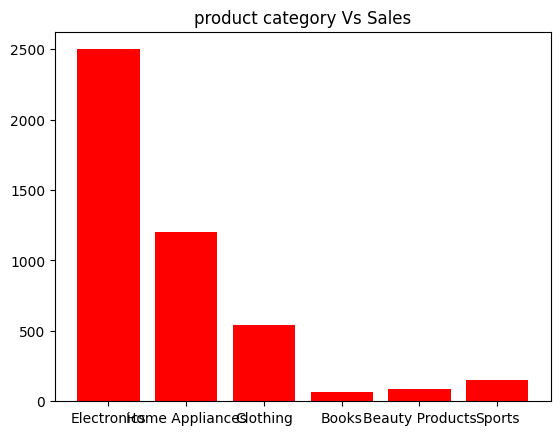

In [39]:
plt.title('product category Vs Sales')

plt.bar(df['product_categories'],df['sales'], color='red')

plt.show()

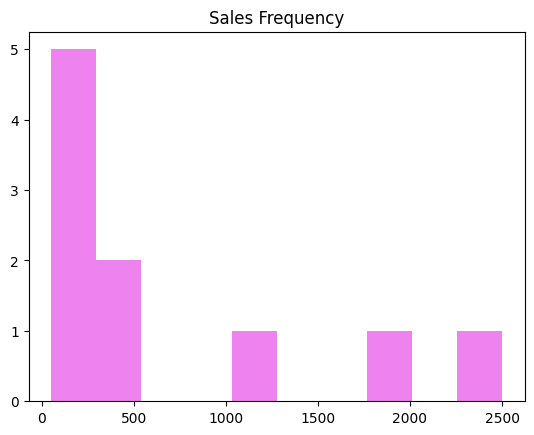

In [45]:
plt.hist(df['sales'],color='violet')

plt.title('Sales Frequency')
plt.show()

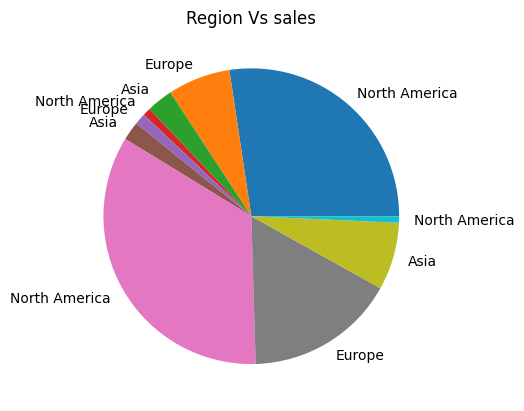

In [51]:
plt.pie(df['sales'],labels = df['region'])

plt.title('Region Vs sales')
plt.show()